In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu as mwu
import seaborn as sns


In [2]:
data = pd.read_csv("anon-data/participants.csv")
control = pd.read_csv("anon-data/control.txt", names=["id"])
experimental = pd.read_csv("anon-data/experimental.txt", names=["id"])

In [3]:
control_list = [x[0] for x in control.values.tolist()]
experimental_list = [x[0] for x in experimental.values.tolist()]

In [4]:
data_control = data[data["id"].isin(control_list)].drop('id', axis=1)
data_experimental = data[data["id"].isin(experimental_list)].drop('id', axis=1)

In [5]:
def get_mean_std_mwu(ctrl, exp, colname):
    ctrl_vals = ctrl[colname]
    exp_vals = exp[colname]

    avg_ctrl = ctrl_vals.mean()
    avg_exp = exp_vals.mean()

    std_ctrl = ctrl_vals.std()
    std_exp = exp_vals.std()

    mwu_result = mwu(ctrl_vals, exp_vals)

    return (avg_ctrl, std_ctrl, avg_exp, std_exp, mwu_result[0], mwu_result[1])


In [6]:
colnames = ["Total Duration (Task 1)", 
            "Total Duration (Task 2)", 
            "Total Duration (Task 3)", 
            "Context Switches (Task 1)", 
            "Context Switches (Task 2)", 
            "Context Switches (Task 3)"]

for i in colnames:
    print(get_mean_std_mwu(data_control, data_experimental, i))

(961.5, 466.46078791969927, 653.0, 232.11419603290102, 9.0, 0.4)
(662.5, 362.7795473838072, 373.3333333333333, 110.86177579911542, 11.0, 0.11428571428571428)
(347.0, 185.9085796836714, 328.6666666666667, 176.14293438379335, 7.0, 0.8571428571428571)
(44.0, 25.099800796022265, 9.0, 6.0, 11.0, 0.11428571428571428)
(26.0, 10.98483803552272, 7.333333333333333, 3.214550253664318, 12.0, 0.05714285714285714)
(18.5, 10.246950765959598, 4.0, 2.0, 11.0, 0.11428571428571428)


In [7]:
def to_snake(text):
    no_spaces = text.replace(' ', '_') if ' ' in text else text
    return no_spaces.lower() 

def plot_context(ctrl, exp, context):
    ctrl_with_group = ctrl.assign(group = ["control"] * len(ctrl))
    exp_with_group = exp.assign(group = ["experimental"] * len(exp))

    merged_data = pd.concat([ctrl_with_group, exp_with_group])

    cols = [f"{context} (Task 1)",
            f"{context} (Task 2)",
            f"{context} (Task 3)",
            "group"]

    subset = merged_data[cols]

    new_df_elems = []

    for _, row in subset.iterrows():
        time_task_1 = row[f"{context} (Task 1)"]
        time_task_2 = row[f"{context} (Task 2)"]
        time_task_3 = row[f"{context} (Task 3)"]

        new_df_elems.append([time_task_1, 1, row["group"]])
        new_df_elems.append([time_task_2, 2, row["group"]])
        new_df_elems.append([time_task_3, 3, row["group"]])

    new_df = pd.DataFrame(new_df_elems, columns=["Time (seconds)", "Task", "Group"])

    sns.boxplot(y='Time (seconds)', x='Task', data=new_df, hue='Group')
    plt.title(f"In {context}")
    processed_context = to_snake(context)
    plt.savefig(f"images/context_{processed_context}.svg")
    plt.show()  

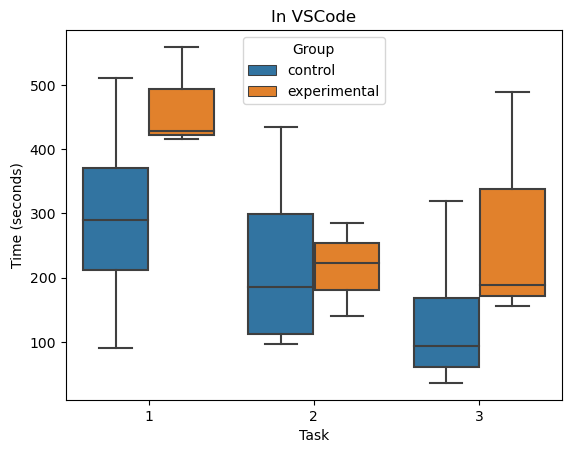

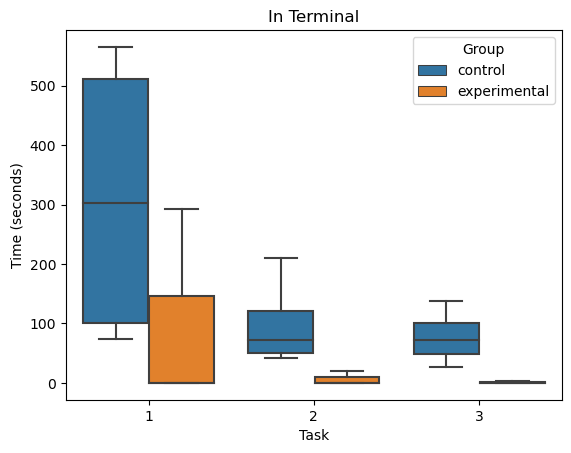

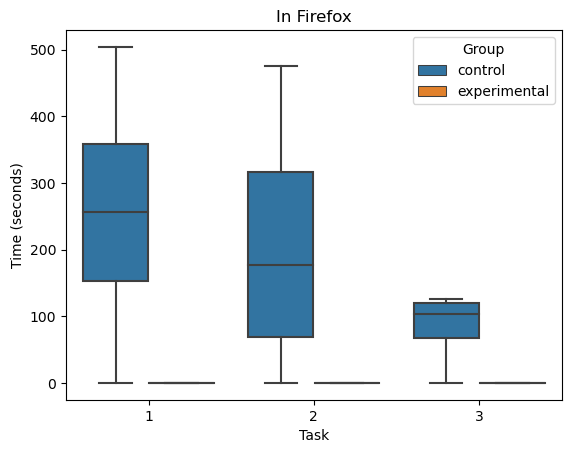

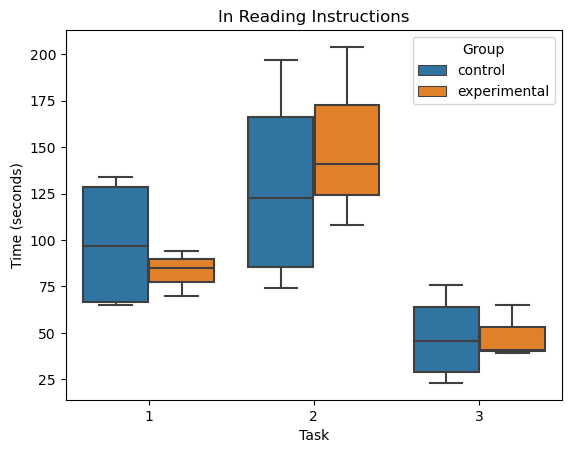

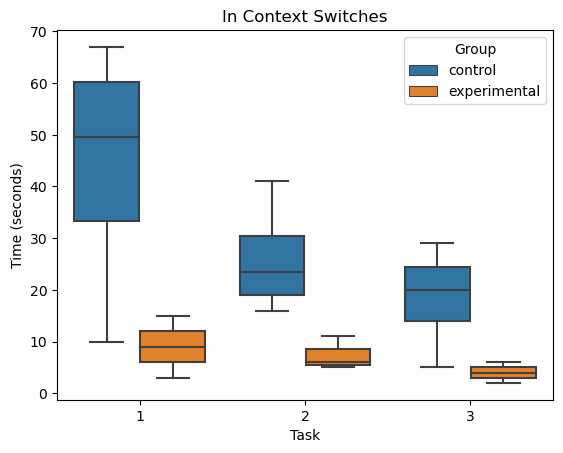

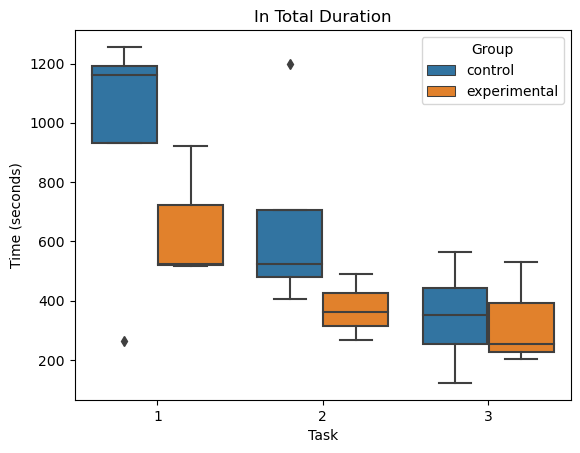

In [8]:
contexts = ["VSCode", "Terminal", "Firefox", "Reading Instructions", "Context Switches", "Total Duration"]

for i in contexts:
    plot_context(data_control, data_experimental, i)